In [2]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [14]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
len(df)

545

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [17]:
# columns which have same value in 75% of the rows
cols = df.columns
for col in cols:
    if df[col].value_counts().max() > 0.75*len(df):
        df = df.drop(col, axis=1)


In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,no,yes,2,furnished
1,12250000,8960,4,4,4,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,2,furnished


In [19]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,price,area,bedrooms,bathrooms,stories,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,0,1,2,0
1,12250000,8960,4,4,4,0,1,3,0
2,12250000,9960,3,2,2,1,0,2,1
3,12215000,7500,4,2,2,1,1,3,0
4,11410000,7420,4,1,2,1,1,2,0


In [21]:
# plot correlation with price
df.corr()['price'].sort_values(ascending=False)

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
basement            0.187057
furnishingstatus   -0.304721
Name: price, dtype: float64

In [22]:
X = df.drop('price', axis=1).values
y = df['price'].values

X = torch.FloatTensor(X)
y = torch.FloatTensor(y)

In [24]:
X.shape, y.shape

(torch.Size([545, 8]), torch.Size([545]))

In [23]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# model

class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [47]:
# model, loss, optimizer
model = ANN()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [52]:
epochs = 10000 + 1
losses = []
for i in range(epochs):

    y_pred = model(X_train) # [n_samples, 1]
    loss = loss_function(y_pred, y_train.view(-1, 1))
    losses.append(loss.item())

    if i % 100 == 0:
        print(f'epoch: {i}, loss: {loss.item()}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0, loss: 3130707935232.0
epoch: 100, loss: 3124956758016.0
epoch: 200, loss: 3118852997120.0
epoch: 300, loss: 3112312766464.0
epoch: 400, loss: 3105222819840.0
epoch: 500, loss: 3097432948736.0
epoch: 600, loss: 3088736321536.0
epoch: 700, loss: 3078846676992.0
epoch: 800, loss: 3067356643328.0
epoch: 900, loss: 3053672726528.0
epoch: 1000, loss: 3036918579200.0
epoch: 1100, loss: 3015767752704.0
epoch: 1200, loss: 2988195971072.0
epoch: 1300, loss: 2951134576640.0
epoch: 1400, loss: 2900042711040.0
epoch: 1500, loss: 2828551585792.0
epoch: 1600, loss: 2728459763712.0
epoch: 1700, loss: 2590849630208.0
epoch: 1800, loss: 2409636823040.0
epoch: 1900, loss: 2187072241664.0
epoch: 2000, loss: 1942627024896.0
epoch: 2100, loss: 1713344741376.0
epoch: 2200, loss: 1531808710656.0
epoch: 2300, loss: 1415638679552.0
epoch: 2400, loss: 1352861745152.0
epoch: 2500, loss: 1318336069632.0
epoch: 2600, loss: 1298171166720.0
epoch: 2700, loss: 1281528037376.0
epoch: 2800, loss: 1267371212800

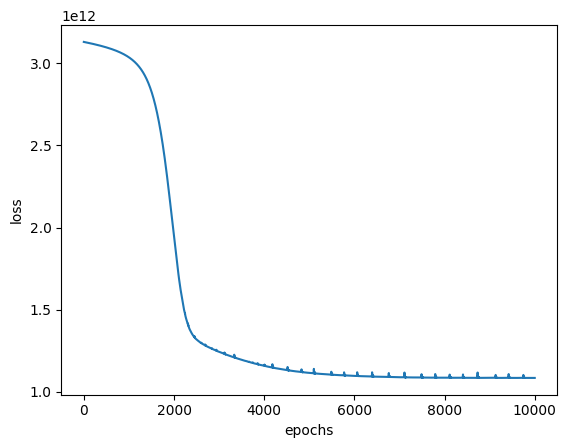

In [53]:
# plot losses
import matplotlib.pyplot as plt
plt.plot(range(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [54]:
with torch.no_grad():
    # rmse
    y_pred = model(X_test)
    loss = torch.sqrt(loss_function(y_pred, y_test.view(-1, 1)))
    print(f'rmse: {loss}')

rmse: 1404625.0


In [55]:
# do it for linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
loss = np.sqrt(np.mean((y_pred - y_test.numpy())**2))
print(f'rmse: {loss}')


rmse: 1406756.375
